In [1]:
#This goes from size 4 to size 128 images
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "/home/ubuntu/fastai/courses/dl1/data/statoil/"
%cd "/home/ubuntu/fastai/courses/dl1/data/statoil/"

/home/ubuntu/data/statoil


In [4]:
#Load train and test data
train = pd.read_json("train.json")
test = pd.read_json("test.json")


In [5]:
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/train/"
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/valid/"
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/test/"
%rm -r  "/home/ubuntu/fastai/courses/dl1/data/statoil/tmp/"


In [6]:
def color_composite(data):
    rgb_arrays = []
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 / band_2

        r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
        g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
        b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))

        rgb = np.dstack((r, g, b))
        rgb_arrays.append(rgb)
    return np.array(rgb_arrays)

In [7]:
X_train = color_composite(train)
X_test = color_composite(test)

In [8]:
%mkdir train
import sys
lenTrain = len(train)
print(lenTrain)
for i in range(0,lenTrain):
    isIceberg = (train.ix[i]['is_iceberg'])
    if(isIceberg == 1):scipy.misc.imsave('train/iceberg.'+str(i)+'.png', X_train[i])
    else:scipy.misc.imsave('train/ship.'+str(i)+'.png', X_train[i])


1604


/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [9]:
%mkdir valid
%cd $PATH/train
g = glob('*.png')
shuf = np.random.permutation(g)
for i in range(500): os.rename(shuf[i], PATH+'/valid/' + shuf[i])

/home/ubuntu/data/statoil/train


In [10]:
%cd $PATH/valid
%mkdir iceberg
%mkdir ship
%mv iceberg.*.png iceberg/
%mv ship.*.png ship/

/home/ubuntu/data/statoil/valid


In [11]:
%cd $PATH/train
%mkdir iceberg
%mkdir ship
%mv iceberg.*.png iceberg/
%mv ship.*.png ship/

/home/ubuntu/data/statoil/train


In [12]:
%cd $PATH
%mkdir test
import scipy.misc
lenTest = len(test)
print(lenTest)
for i in range(lenTest):
    scipy.misc.imsave('test/'+str(i)+'.png', X_test[i])


/home/ubuntu/data/statoil
8424


In [13]:
f_model = resnet18
bs = 32

In [14]:
def get_data(sz, bs):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.00)
    data = ImageClassifierData.from_paths(PATH, test_name = 'test', bs = bs,
                                          tfms = tfms)
    return data

In [15]:
sz=4


In [16]:
data = get_data(sz,bs)
learn = ConvLearner.pretrained(f_model, data)

A Jupyter Widget

 91%|█████████▏| 32/35 [00:03<00:00,  9.62it/s, loss=3.47] 


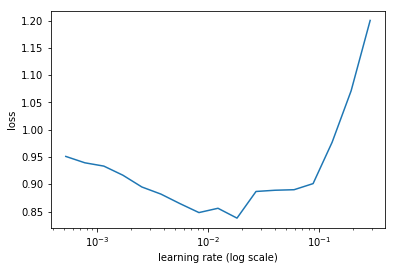

In [17]:
lrf=learn.lr_find()
learn.sched.plot()

In [18]:
lr = 0.003

In [19]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

A Jupyter Widget

[ 0.       0.37577  0.73196  0.58711]                      
[ 1.       0.5117   0.58678  0.725  ]                      
[ 2.       0.56026  0.54504  0.69297]                      
[ 3.       0.5703   0.56342  0.68516]                      
[ 4.       0.59117  0.56568  0.66875]                      
[ 5.       0.59354  0.54781  0.69023]                      
[ 6.       0.58083  0.5413   0.68789]                      
[ 7.       0.58805  0.54306  0.6832 ]                      
[ 8.       0.57747  0.562    0.68437]                      
[ 9.       0.56759  0.56321  0.67852]                      
[ 10.        0.57127   0.54998   0.69023]                  
[ 11.        0.55747   0.56409   0.67852]                  
[ 12.        0.56293   0.552     0.69023]                  



In [20]:
lrs = np.array([lr/9,lr/3,lr])

In [21]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.3556   0.64812  0.62422]                      
[ 1.       0.50789  0.59615  0.62578]                      
[ 2.       0.57143  0.60322  0.64727]                      
[ 3.       0.59273  0.64463  0.67266]                      
[ 4.       0.61053  0.59467  0.68164]                      
[ 5.       0.59766  0.59082  0.69531]                      
[ 6.       0.5878   0.60411  0.67969]                      



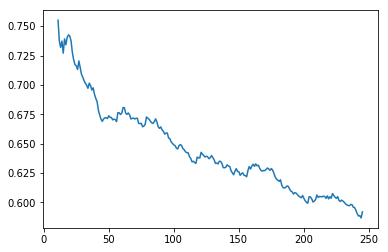

In [22]:
learn.sched.plot_loss()

In [23]:
sz=8

In [24]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

100%|██████████| 264/264 [00:04<00:00, 53.24it/s]


A Jupyter Widget

[ 0.       0.328    0.57337  0.68555]                      
[ 1.       0.48211  0.64685  0.67539]                      
[ 2.       0.5442   1.17217  0.67148]                      
[ 3.       0.56494  1.32271  0.67734]                      
[ 4.       0.5867   2.12964  0.68008]                      
[ 5.       0.59666  2.07665  0.65391]                      
[ 6.       0.59404  1.82382  0.6668 ]                      
[ 7.       0.60368  1.90457  0.68906]                      
[ 8.       0.59952  1.49738  0.67773]                      
[ 9.       0.59076  1.69106  0.66367]                      
[ 10.        0.59102   1.7011    0.67422]                  
[ 11.        0.5755    1.89632   0.66523]                  
[ 12.        0.57067   1.37925   0.67812]                  



In [25]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')


A Jupyter Widget

[ 0.       0.32752  0.62111  0.65156]                      
[ 1.       0.48072  0.60005  0.63633]                      
[ 2.       0.54609  0.60051  0.64609]                      
[ 3.       0.56188  0.58096  0.66719]                      
[ 4.       0.57743  0.56809  0.6793 ]                      
[ 5.       0.58447  0.58312  0.67578]                      
[ 6.       0.56829  0.58399  0.67383]                      



In [26]:
##
sz=16

In [27]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

100%|██████████| 264/264 [00:04<00:00, 53.57it/s]


A Jupyter Widget

[ 0.       0.3295   0.61446  0.6668 ]                      
[ 1.       0.48814  0.69383  0.6707 ]                      
[ 2.       0.55445  0.70064  0.6832 ]                      
[ 3.       0.5845   0.73095  0.69102]                      
[ 4.       0.60055  0.70892  0.66758]                      
[ 5.       0.60833  0.95541  0.71758]                      
[ 6.       0.60772  1.28306  0.69141]                      
[ 7.       0.59131  1.13323  0.69258]                      
[ 8.       0.60119  0.82331  0.725  ]                      
[ 9.       0.5914   0.8233   0.72773]                      
[ 10.        0.59486   0.76943   0.71641]                  
[ 11.        0.59862   0.76547   0.71406]                  
[ 12.        0.59278   0.61203   0.71992]                  



In [28]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')


A Jupyter Widget

[ 0.       0.30443  0.59958  0.65469]                      
[ 1.       0.43041  0.51961  0.75195]                      
[ 2.       0.46658  0.49597  0.76562]                      
[ 3.       0.47476  0.45826  0.75977]                      
[ 4.       0.48968  0.42056  0.79219]                      
[ 5.       0.4828   0.43287  0.77266]                      
[ 6.       0.47426  0.44502  0.77305]                      



In [29]:
sz=32

In [30]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

100%|██████████| 264/264 [00:05<00:00, 48.55it/s]


A Jupyter Widget

[ 0.       0.35424  0.69654  0.57578]                      
[ 1.       0.51762  0.6663   0.61484]                      
[ 2.       0.60247  0.65629  0.62852]                      
[ 3.       0.63099  0.64053  0.64023]                      
[ 4.       0.6513   0.64519  0.63633]                      
[ 5.       0.64672  0.69468  0.61953]                      
[ 6.       0.6477   0.68413  0.64297]                      
[ 7.       0.64846  0.6334   0.65195]                      
[ 8.       0.64665  0.64707  0.64805]                      
[ 9.       0.63118  0.66476  0.63828]                      
[ 10.        0.64183   0.62731   0.65625]                  
[ 11.        0.63939   0.61464   0.65508]                  
[ 12.        0.63601   0.62515   0.64609]                  



In [31]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.27382  0.47323  0.76406]                      
[ 1.       0.3841   0.43076  0.75938]                      
[ 2.       0.42506  0.4459   0.76445]                      
[ 3.       0.42473  0.4623   0.74492]                      
[ 4.       0.41664  0.40093  0.80742]                      
[ 5.       0.41301  0.40502  0.78984]                      
[ 6.       0.4288   0.40697  0.7918 ]                      



In [32]:
sz=64

In [33]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

100%|██████████| 264/264 [00:07<00:00, 37.57it/s]


A Jupyter Widget

[ 0.       0.34701  0.64718  0.62383]                      
[ 1.       0.47917  0.56423  0.68711]                      
[ 2.       0.55122  0.57139  0.67539]                      
[ 3.       0.58172  0.56288  0.68516]                      
[ 4.       0.58617  0.5514   0.69297]                      
[ 5.       0.59384  0.54624  0.71445]                      
[ 6.       0.58203  0.53987  0.70273]                      
[ 7.       0.58745  0.54139  0.71055]                      
[ 8.       0.5832   0.53671  0.70352]                      
[ 9.       0.58269  0.53524  0.7125 ]                      
[ 10.        0.58589   0.5293    0.70156]                  
[ 11.        0.57071   0.52803   0.70937]                  
[ 12.        0.56387   0.5266    0.70352]                  



In [34]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.26997  0.45341  0.76562]                      
[ 1.       0.37008  0.43296  0.76016]                      
[ 2.       0.41343  0.41826  0.77773]                      
[ 3.       0.42326  0.38782  0.80234]                      
[ 4.       0.41379  0.36583  0.82266]                      
[ 5.       0.40359  0.36148  0.8043 ]                      
[ 6.       0.40812  0.40153  0.78906]                      



In [35]:
sz=75

In [36]:
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

100%|██████████| 264/264 [00:08<00:00, 31.76it/s]


A Jupyter Widget

[ 0.       0.25634  0.47455  0.7582 ]                      
[ 1.       0.37115  0.45257  0.77227]                      
[ 2.       0.41886  0.4592   0.77227]                      
[ 3.       0.45144  0.44843  0.78008]                      
[ 4.       0.44297  0.44428  0.77617]                      
[ 5.       0.45324  0.44366  0.77227]                      
[ 6.       0.44685  0.43397  0.76641]                      
[ 7.       0.44732  0.43618  0.76445]                      
[ 8.       0.43735  0.43076  0.76836]                      
[ 9.       0.43671  0.43676  0.75859]                      
[ 10.        0.44034   0.42506   0.77031]                  
[ 11.        0.44392   0.43763   0.75273]                  
[ 12.        0.43827   0.42681   0.76641]                  



In [37]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.21357  0.34353  0.82383]                      
[ 1.       0.29657  0.33216  0.83164]                      
[ 2.       0.32194  0.33742  0.83281]                      
[ 3.       0.34151  0.35781  0.82305]                      
[ 4.       0.35295  0.31723  0.82773]                      
[ 5.       0.34791  0.32989  0.82891]                      
[ 6.       0.33659  0.32428  0.82773]                      



In [38]:
from sklearn import metrics

log_preds,y = learn.TTA()
probs = np.exp(log_preds)
accuracy(log_preds,y), metrics.log_loss(y, probs)


(0.872, 0.27524485795013609)

In [ ]:
#for file submission
#Actual test files are used for submission
test_preds = learn.TTA(is_test = True)
submission = pd.DataFrame()
submission['id'] = test['id']
submission['is_iceberg'] = pd.DataFrame({'is_iceberg':list(np.exp(test_preds[0][:][:,0]))})
#print(test_preds[:,0])
#submission['is_iceberg'] = pd.DataFrame({'is_iceberg':list(np.exp(test_preds[0][:,0]))})
submission.to_csv('sub_10.csv', index=False)
